# ARIMA METHOD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df['Month'] = pd.to_datetime(df['Month'])

In [4]:
df.set_index('Month',inplace=True)

In [5]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


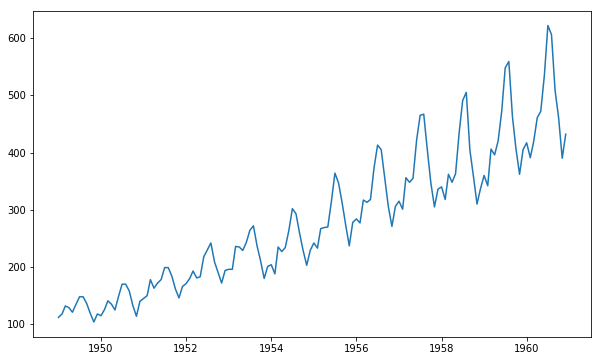

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
rolling_mean = df.rolling(12).mean()
rolling_std = df.rolling(12).std()

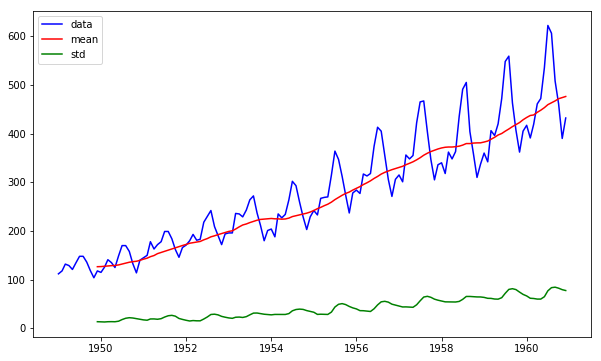

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df,color='blue',label='data')
plt.plot(rolling_mean,color='red',label='mean')
plt.plot(rolling_std,color='green',label='std')
plt.legend()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
df.isnull().sum()

#Passengers    0
dtype: int64

In [12]:
adfuller(df['#Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
log_df = np.log(df)

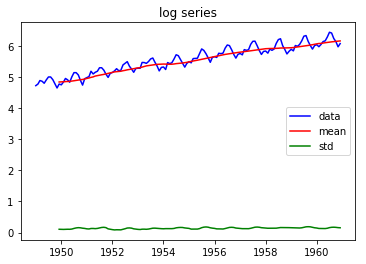

In [14]:
log_rolling_mean = log_df.rolling(12).mean()
log_rolling_std = log_df.rolling(12).std()
plt.figure(figsize=(6,4))
plt.plot(log_df,color='blue',label='data')
plt.plot(log_rolling_mean,color='red',label='mean')
plt.plot(log_rolling_std,color='green',label='std')
plt.title('log series')
plt.legend()

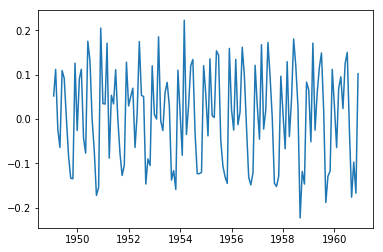

In [15]:
log_diff_1 = log_df-log_df.shift()
plt.plot(log_diff_1)

In [16]:
adfuller(log_diff_1['#Passengers'].dropna().values)

(-2.7171305983881595,
 0.07112054815085424,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decompose = seasonal_decompose(log_df)

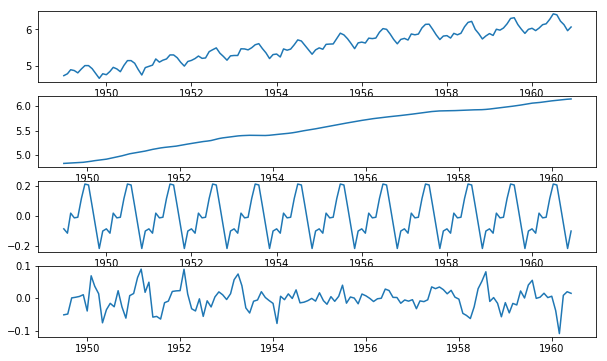

In [19]:
fig = plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(log_df)
plt.subplot(412)
plt.plot(decompose.trend)
plt.subplot(413)
plt.plot(decompose.seasonal)
plt.subplot(414)
plt.plot(decompose.resid)

In [20]:
adfuller(decompose.resid['#Passengers'].dropna())

(-6.332386797644868,
 2.8850589033233625e-08,
 9,
 122,
 {'1%': -3.4851223522012855,
  '5%': -2.88553750045158,
  '10%': -2.5795685622144586},
 -517.2642969403789)

In [21]:
residual = decompose.resid['#Passengers']

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

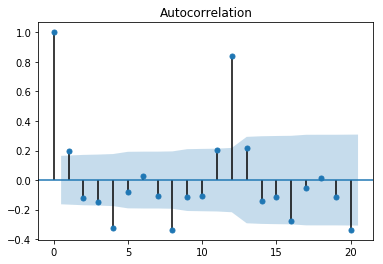

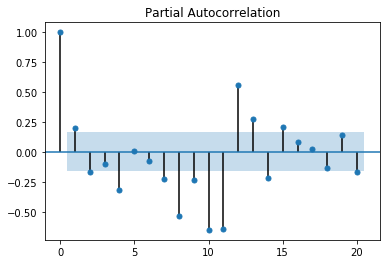

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(log_diff_1['#Passengers'].dropna(), lags =20)
plot_pacf(log_diff_1['#Passengers'].dropna(), lags =20)

plt.show()

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model = ARIMA(log_df['#Passengers'].dropna(), order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Sahil Sharma\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Sahil Sharma\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Thu, 07 Nov 2019   AIC                           -287.281
Time:                        16:51:52   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.D.#Passengers     1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.D.#Passeng

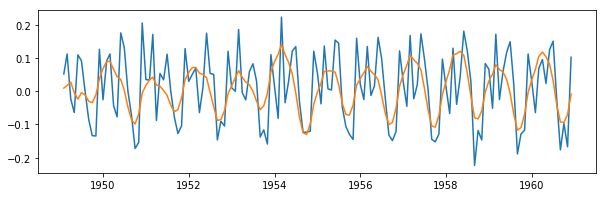

In [26]:
plt.figure(figsize=(10,3))
plt.plot(log_diff_1)
plt.plot(model_fit.fittedvalues)

In [27]:
predictions_log_diff = pd.Series(model_fit.fittedvalues,copy=True)
predictions_log_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [28]:
predictions_log_diff_cumsum = predictions_log_diff.cumsum()
predictions_log_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [29]:
predictions_log = pd.Series(log_df.ix[0,0],index=log_df.index)
predictions_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

In [30]:
predictions_log = predictions_log.add(predictions_log_diff_cumsum, fill_value=0)
predictions_log.tail()

Month
1960-08-01    6.091052
1960-09-01    5.998702
1960-10-01    5.904689
1960-11-01    5.834765
1960-12-01    5.826638
dtype: float64

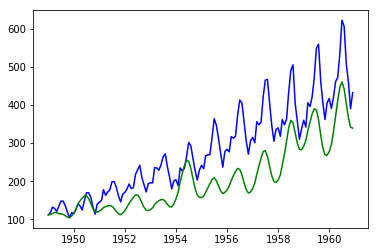

In [31]:
predictions_exp = np.exp(predictions_log)
plt.plot(df['#Passengers'],color='blue')
plt.plot(predictions_exp,color='green')

# SARIMA 

In [32]:
import pmdarima as pm

In [56]:
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.979 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.671 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.961 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.201 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.137, BIC=1035.513, Fit time=2.290 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1017.165, BIC=1034.416, Fit time=8.468 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.845, BIC=1048.221, Fit time=5.740 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.212, BIC=1038.339, Fit time=11.042 seconds
Fit ARIMA: order=(1, 1, 1) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -499.448
Date:                            Thu, 07 Nov 2019   AIC                           1014.897
Time:                                    19:35:22   BIC                           1037.898
Sample:                                         0   HQIC                          1024.243
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.019      0.016      0.987      -0.038       0.038
ar.L1          0.5126      0.098      5.258      0.000       0.322       0.704
ar.L2          0.2674      0.099      2.711      0.007       0.074       0.461
ma.L1         -0.9786      0.055    -17.858      0.000      -1.086      -0.871
ar.S.L12       0.7249      0.426      1.703      0.089      -0.109       1.559
ar.S.L24       0.2678      0.131      2.041      0.041       0.011       0.525
ma.S.L12      -0.9629      1.211     -0.795      0.426      -3.336       1.410
sigma2       116.4647     84.449      1.379      0.168     -49.052     281.981
===================================================================================
Ljung-Box (Q):                       51.72   Jarque-Bera (JB):                10.75
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

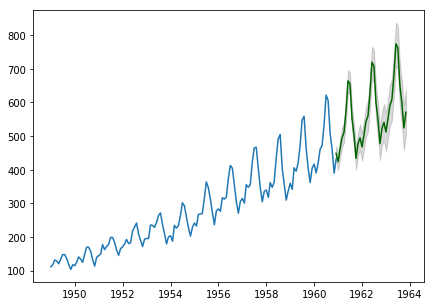

In [57]:
n_periods = 36
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(7,5))
plt.plot(df)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.show()

# USING LSTMs

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [62]:
np.random.seed(123)

In [63]:
df = pd.read_csv('AirPassengers.csv')

In [66]:
dataset = df['#Passengers'].values

In [71]:
dataset = data.reshape(-1,1)

In [77]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [78]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

In [79]:
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

In [110]:
train_x = []
train_y = []
for i in range(len(train)-1):
    train_x.append(train[i])
    train_y.append(train[i+1])

test_x = []
test_y = []
for i in range(len(test)-1):
    test_x.append(test[i])
    test_y.append(test[i+1])
train_x = np.array(train_x)
test_x = np.array(test_x)
train_y = np.array(train_y)
test_y = np.array(test_y)

In [111]:
train_X = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_X = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [113]:
model = Sequential()
model.add(LSTM(4, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
95/95 [==============================] - 2s 17ms/step - loss: 0.0535
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 3/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0207
Epoch 4/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 5/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 6/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0165
Epoch 7/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 8/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 9/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 10/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 11/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 12/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0121
Epoch 13/100
95/95 [================

In [114]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [121]:
train_pred = scaler.inverse_transform(train_pred)
train_y = scaler.inverse_transform(train_y)
test_pred = scaler.inverse_transform(test_pred)
test_y = scaler.inverse_transform(test_y)

In [126]:
train.shape

(96, 1)

In [127]:
test.shape

(48, 1)

In [147]:
import math
trainScore = math.sqrt(mean_squared_error(train_y, train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_y, test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.09 RMSE


In [159]:
train_pred_plot = np.empty_like(dataset)

In [160]:
len(train_pred)

95

In [161]:
len(test_pred)

47

In [162]:
train_pred_plot[:] = np.nan
train_pred_plot[1:len(train_pred)+1, :] = train_pred

In [164]:
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:] = np.nan

In [169]:
train_pred_plot[95]

array([0.32076573])

In [165]:
test_pred_plot.shape

(144, 1)

In [171]:
test_pred_plot[len(train_pred)+1:len(dataset)-1, :] = test_pred

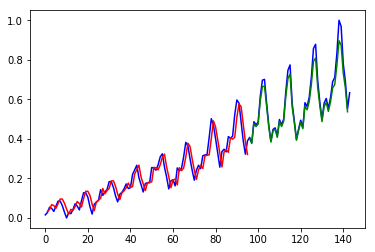

In [174]:
plt.plot(scaler.inverse_transform(dataset), color='blue')
plt.plot(train_pred_plot,color='red')
plt.plot(test_pred_plot,color='green')
plt.show()